In [347]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [348]:
df_en = pd.read_csv('./graph_data/US_en.csv', encoding='utf-8')
df_fr = pd.read_csv('./graph_data/FR_fr.csv', encoding='utf-8')
# df_es = pd.read_csv('./graph_data/MX_es.csv', encoding='utf-8')
df_de = pd.read_csv('./graph_data/DE_de.csv', encoding='utf-8')
df_it = pd.read_csv('./graph_data/IT_it.csv', encoding='utf-8')
df_uk = pd.read_csv('./graph_data/GB_en.csv', encoding='utf-8')

df_cssa = pd.read_csv('./new_confirmed.csv', encoding='utf-8')


In [349]:
def standerize(list):
    max_ = max(list)
    min_ = min(list)
    diff = max_ - min_
    std_list = [(e-min_)/diff for e in list]
    return std_list

In [350]:
def smooth(x_list, y_list, xnew):
    y_func = np.polyfit(x_list, y_list, 20)
    y_smooth = np.polyval(y_func, xnew)
    return y_smooth

In [351]:
# NegtiveEmo

filenames = list(df_fr['Filename'])
date = [filename[-9:-4] for filename in filenames]

negemo_us = df_en['negemo'].values.tolist()
negemo_fr = df_fr.iloc[:,33].values.tolist()
# negemo_es = df_es['EmoNeg'].values.tolist()
negemo_de = df_de['negemo'].values.tolist()
negemo_it = df_it['Emo_Neg'].values.tolist()
negemo_pt = df_uk['negemo'].values.tolist()
# negemo_en = negemo_en[8:]

negemo = [negemo_us, negemo_de, negemo_fr, negemo_it, negemo_pt]

min_neg = [emo.index(min(emo)) for emo in negemo]
max_neg = [emo.index(max(emo)) for emo in negemo]
languages = ['US', 'German', 'France', 'Italy', 'UK']

print(max_neg)

[26, 6, 52, 3, 9]


In [352]:
mean_neg = [np.mean(emo_list) for emo_list in negemo  ]
std_meanneg = []
for i in range(5):
    std_mean = (mean_neg[i] - negemo[i][min_neg[i]]) / (negemo[i][max_neg[i]] - negemo[i][min_neg[i]])
    std_meanneg.append(std_mean)
print(std_meanneg)

std_negemo = [standerize(emo) for emo in negemo]
print(mean_neg)

[0.4018808777429465, 0.4545454545454547, 0.5230055658627087, 0.538, 0.48376623376623384]
[2.6596363636363636, 2.0545454545454547, 2.575090909090909, 1.996, 2.522727272727273]


In [353]:
scale = np.arange(0, len(date), 1)
xnew = np.linspace(scale.min(), scale.max(), 1000)
sm_negemo = [smooth(scale, emo, xnew) for emo in std_negemo]
max_smneg = [max(smemo) for smemo in sm_negemo]

C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly cond

C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


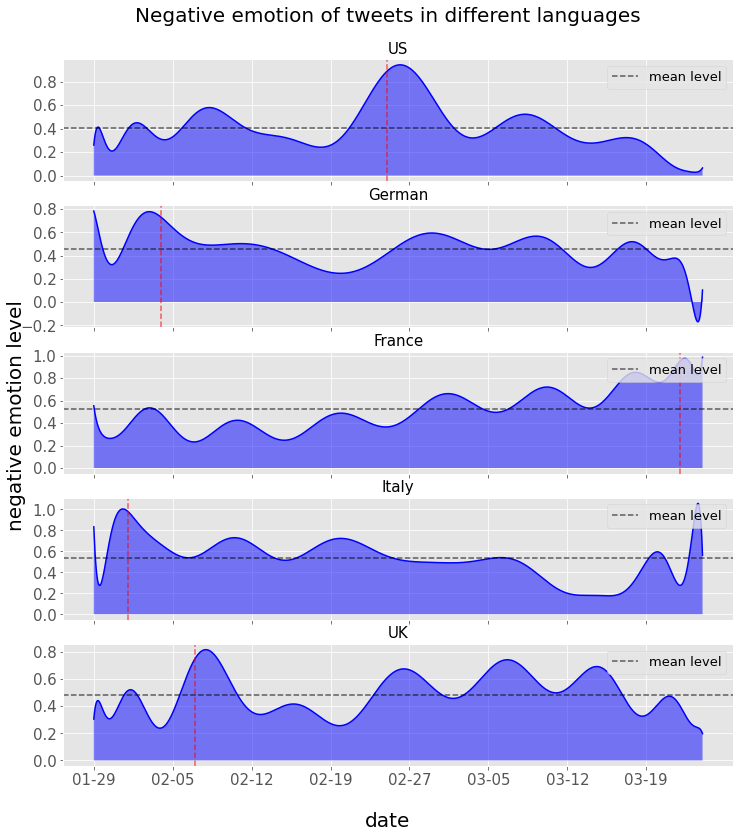

In [354]:
fig, axes = plt.subplots(5, 1, sharex='col', sharey='row', figsize=(12,13))
plt.style.use('ggplot')
fig.text(0.5, 0.92, 'Negative emotion of tweets in different languages', ha='center', fontsize=20)
fig.text(0.5, 0.06, 'date', ha='center', fontsize=20)
fig.text(0.06, 0.5, 'negative emotion level', va='center', rotation='vertical', fontsize=20)
for i in range(5):
    axes[i].set_title(languages[i], fontsize=15)
    axes[i].plot(xnew, sm_negemo[i], color='blue')
    axes[i].fill_between(xnew, std_negemo[i][min_neg[i]], sm_negemo[i], facecolor='blue', alpha=0.5)
    axes[i].fill_between(date, std_negemo[i][min_neg[i]], std_negemo[i][min_neg[i]], facecolor='blue', alpha=0.5)
    axes[i].set_xticks(date[::7])
    axes[i].axvline(date[max_neg[i]], ls='--', alpha=0.6, c='red')
    axes[i].axhline(std_meanneg[i], ls='--', alpha=0.6, c='black', label='mean level')
    axes[i].legend(loc=1, fontsize=13)
    
    for t in axes[i].get_yticklabels():
        t.set_fontsize(15)

    for t in axes[i].get_xticklabels():
        t.set_fontsize(15)

fig.show()
fig.savefig('./images/negemo.pdf')


In [355]:
confirm_us_df = df_cssa[df_cssa['Country/Region']=='US']
confirm_us = confirm_us_df.iloc[:,3:].values.tolist()[0]

# confirm_mx_df = df_cssa[df_cssa['Country/Region']=='Mexico']
# confirm_mx = confirm_mx_df.iloc[:,3:].values.tolist()[0]

confirm_fr_df = df_cssa[df_cssa['Country/Region']=='France']
# confirm_fr_df = confirm_fr_df[confirm_fr_df['Province/State'] == None]
confirm_fr = confirm_fr_df.iloc[:,3:].values.tolist()[0]

confirm_it_df = df_cssa[df_cssa['Country/Region']=='Italy']
confirm_it = confirm_it_df.iloc[:,3:].values.tolist()[0]

confirm_gb_df = df_cssa[df_cssa['Country/Region']=='United Kingdom']
confirm_gb = confirm_gb_df.iloc[:,3:].values.tolist()[0]

confirm_de_df = df_cssa[df_cssa['Country/Region']=='Germany']
confirm_de = confirm_gb_df.iloc[:,3:].values.tolist()[0]

conf_list = [confirm_us, confirm_de, confirm_fr, confirm_it, confirm_gb]

std_confirm = [standerize(conf) for conf in conf_list]
print(confirm_fr)

[1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 20, 19, 43, 30, 61, 13, 81, 92, 276, 296, 177, 83, 575, 497, 0, 1380, 808, 30, 2134, 1019, 1391, 1828, 1741, 1670, 1736, 3838, 2448]


In [356]:
posemo_us = df_en['posemo'].values.tolist()
posemo_fr = df_fr.iloc[:,32].values.tolist()
# posemo_es = df_es['EmoPos'].values.tolist()
posemo_de = df_de['posemo'].values.tolist()
posemo_it = df_it['Emo_Pos'].values.tolist()
posemo_pt = df_uk['posemo'].values.tolist()

posemo = [posemo_us, posemo_de, posemo_fr, posemo_it, posemo_pt]

min_pos = [emo.index(min(emo)) for emo in posemo]
max_pos = [emo.index(max(emo)) for emo in posemo]

print(max_pos)

[52, 48, 31, 54, 50]


In [357]:
mean_pos = [np.mean(emo_list) for emo_list in posemo  ]
std_meanpos = []
for i in range(5):
    std_mean = (mean_pos[i] - posemo[i][min_pos[i]]) / (posemo[i][max_pos[i]] - posemo[i][min_pos[i]])
    std_meanpos.append(std_mean)
print(std_meanpos)

std_posemo = [standerize(emo) for emo in posemo]
print(mean_pos)

[0.4734724292101341, 0.5218130311614732, 0.48912801484230006, 0.37538461538461537, 0.3937686726419119]
[2.8276363636363637, 2.5620000000000003, 4.688363636363635, 0.384, 2.9587272727272724]


In [358]:
sm_posemo = [smooth(scale, emo, xnew) for emo in std_posemo]
sm_confirm = [smooth(scale, conf, xnew) for conf in std_confirm]
max_smpos = [max(smemo) for smemo in sm_posemo]

C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipyker

C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:53: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


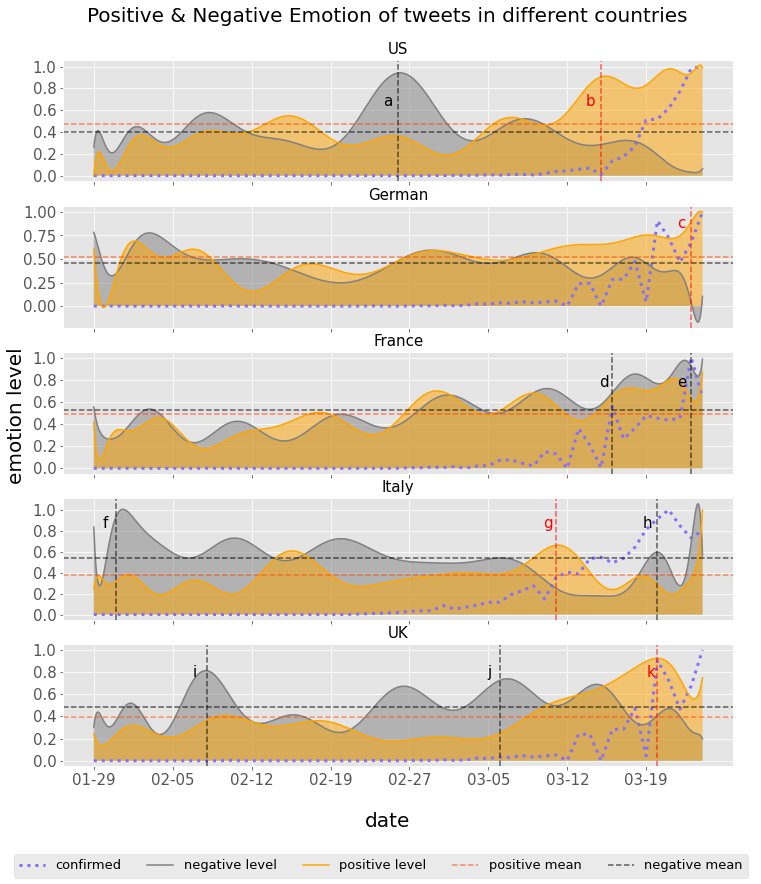

In [359]:
h, l = None, None

fig, axes = plt.subplots(5, 1, sharex='col', sharey='row', figsize=(12,13))
plt.style.use('ggplot')
fig.text(0.5, 0.92, 'Positive & Negative Emotion of tweets in different countries', ha='center', fontsize=20)
fig.text(0.5, 0.06, 'date', ha='center', fontsize=20)
fig.text(0.06, 0.5, 'emotion level', va='center', rotation='vertical', fontsize=20)
fig.text(0.495, 0.83, 'a', c='black', fontsize=15)
fig.text(0.73, 0.83, 'b', c='red', fontsize=15)
fig.text(0.835, 0.70, 'c', c='red', fontsize=15)
fig.text(0.745, 0.53, 'd', c='black', fontsize=15)
fig.text(0.835, 0.53, 'e', c='black', fontsize=15)
fig.text(0.17, 0.38, 'f', c='black', fontsize=15)
fig.text(0.68, 0.38, 'g', c='red', fontsize=15)
fig.text(0.795, 0.38, 'h', c='black', fontsize=15)
fig.text(0.275, 0.22, 'i', c='black', fontsize=15)
fig.text(0.6155, 0.22, 'j', c='black', fontsize=15)
fig.text(0.80, 0.22, 'k', c='red', fontsize=15)
for i in range(5):
    axes[i].set_title(languages[i], fontsize=15)
    axes[i].plot(date, std_confirm[i], color='#836FFF', label='confirmed', ls=':', linewidth=3.0)
    axes[i].plot(xnew, sm_negemo[i], color='gray', label='negative level')
    axes[i].fill_between(xnew, std_negemo[i][min_neg[i]], sm_negemo[i], facecolor='gray', alpha=0.5)
    axes[i].fill_between(date, std_negemo[i][min_neg[i]], std_negemo[i][min_neg[i]], facecolor='blue', alpha=0.5)
    axes[i].plot(xnew, sm_posemo[i], color='orange', label='positive level')
    axes[i].fill_between(xnew, std_posemo[i][min_pos[i]], sm_posemo[i], facecolor='orange', alpha=0.5)
    axes[i].fill_between(date, std_posemo[i][min_pos[i]], std_posemo[i][min_pos[i]], facecolor='blue', alpha=0.5)
    axes[i].set_xticks(date[::7])
    # axes[i].axvline(date[max_pos[i]], ls='--', alpha=0.6, c='red')
    axes[i].axhline(std_meanpos[i], ls='--', alpha=0.6, c='#FF4500', label='positive mean')
    # axes[i].axvline(date[max_neg[i]], ls='--', alpha=0.6, c='blue')
    axes[i].axhline(std_meanneg[i], ls='--', alpha=0.6, c='black', label='negative mean')
    h, l = axes[i].get_legend_handles_labels()
    for t in axes[i].get_yticklabels():
        t.set_fontsize(15)

    for t in axes[i].get_xticklabels():
        t.set_fontsize(15)

axes[0].axvline(date[45], ls='--', alpha=0.6, c='red')
axes[0].axvline(date[27], ls='--', alpha=0.6, c='black')
axes[1].axvline(date[53], ls='--', alpha=0.6, c='red')
axes[2].axvline(date[53], ls='--', alpha=0.6, c='black')
axes[2].axvline(date[46], ls='--', alpha=0.6, c='black')
axes[3].axvline(date[2], ls='--', alpha=0.6, c='black')
axes[3].axvline(date[50], ls='--', alpha=0.6, c='black')
axes[3].axvline(date[41], ls='--', alpha=0.6, c='red')
axes[4].axvline(date[10], ls='--', alpha=0.6, c='black')
axes[4].axvline(date[36], ls='--', alpha=0.6, c='black')
axes[4].axvline(date[50], ls='--', alpha=0.6, c='red')
fig.legend(h, l, loc=8, fontsize=13, ncol=len(h))
# print(handles)
fig.show()
# print(h)
fig.savefig('./images/posemo.pdf')

In [360]:
anxemo_fr = standerize(df_fr.iloc[:,34].values.tolist())
# anxemo_es = standerize(df_es['Ansiedad'].values.tolist())
# anxemo_de = standerize([np.nan]*31 + df_de['anx'].values.tolist())
anxemo_it = standerize(df_it['Ansia'].values.tolist())
anxemo_pt = standerize(df_uk['anx'].values.tolist())
anxemo_us = standerize(df_en['anx'].values.tolist())
anxemo_de = standerize(df_de['anx'].values.tolist())

anxemo = [anxemo_us, anxemo_de, anxemo_fr, anxemo_it, anxemo_pt]

min_anx = [emo.index(min(emo)) for emo in anxemo]
max_anx = [emo.index(max(emo)) for emo in anxemo]

print(max_anx)

[25, 0, 18, 0, 37]


In [361]:
bio_us = standerize(df_en['anger'].values.tolist())
bio_uk = standerize(df_uk['anger'].values.tolist())
bio_fr = standerize(df_fr['tristesse'].values.tolist())
bio_it = standerize(df_it['Rabbia'].values.tolist())
# bio_es = standerize(df_es['Biolog'].values.tolist())
bio_de = standerize(df_de['anger'].values.tolist())

bio = [bio_us, bio_de, bio_fr, bio_it, bio_uk]

min_bio = [b.index(min(b)) for b in bio]
max_bio = [b.index(max(b)) for b in bio]

print(max_bio)

[29, 8, 52, 19, 9]


In [362]:
mean_anx = [np.mean(emo_list) for emo_list in anxemo  ]
std_meananx = []
for i in range(5):
    std_mean = (mean_anx[i] - anxemo[i][min_anx[i]]) / (anxemo[i][max_anx[i]] - anxemo[i][min_anx[i]])
    std_meananx.append(std_mean)
# print(std_meananx)

std_anxemo = [standerize(emo) for emo in anxemo]
# print(mean_anx)

In [363]:
mean_bio = [np.mean(b) for b in bio]
std_meanbio = []
for i in range(5):
    std_mean = (mean_bio[i] - bio[i][min_bio[i]]) / (bio[i][max_bio[i]] - bio[i][min_bio[i]])
    std_meanbio.append(std_mean)
print(std_meanbio)

std_bio = [standerize(b) for b in bio]
# print()

[0.4454545454545455, 0.3085676913015043, 0.4829705505761843, 0.5458333333333334, 0.41227272727272724]


In [364]:
sm_anxemo = [smooth(scale, emo, xnew) for emo in std_anxemo]
max_smanx = [max(smemo) for smemo in sm_anxemo]

C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


In [365]:
sm_bio = [smooth(scale, bi, xnew) for bi in std_bio]
max_smbio = [max(smb) for smb in sm_bio]

C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


C:\Users\hamburger_sct\Anaconda3\envs\nlp_env\lib\site-packages\ipykernel_launcher.py:47: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


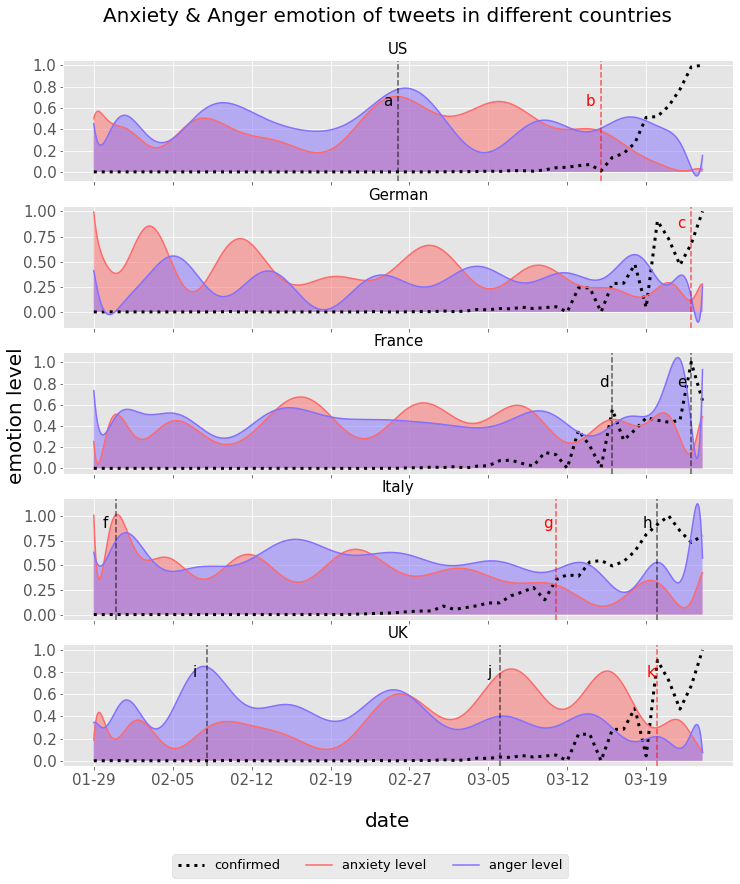

In [366]:
fig, axes = plt.subplots(5, 1,sharex='col', figsize=(12,13))
plt.style.use('ggplot')
fig.text(0.495, 0.83, 'a', c='black', fontsize=15)
fig.text(0.73, 0.83, 'b', c='red', fontsize=15)
fig.text(0.835, 0.70, 'c', c='red', fontsize=15)
fig.text(0.745, 0.53, 'd', c='black', fontsize=15)
fig.text(0.835, 0.53, 'e', c='black', fontsize=15)
fig.text(0.17, 0.38, 'f', c='black', fontsize=15)
fig.text(0.68, 0.38, 'g', c='red', fontsize=15)
fig.text(0.795, 0.38, 'h', c='black', fontsize=15)
fig.text(0.275, 0.22, 'i', c='black', fontsize=15)
fig.text(0.6155, 0.22, 'j', c='black', fontsize=15)
fig.text(0.80, 0.22, 'k', c='red', fontsize=15)

fig.text(0.5, 0.92, 'Anxiety & Anger emotion of tweets in different countries', ha='center', fontsize=20)
fig.text(0.5, 0.06, 'date', ha='center', fontsize=20)
fig.text(0.06, 0.5, 'emotion level', va='center', rotation='vertical', fontsize=20)
for i in range(5):
    axes[i].set_title(languages[i], fontsize=15)
    axes[i].plot(date, std_confirm[i], color='black', label='confirmed', ls=':', linewidth=3.0)
    axes[i].plot(xnew, sm_anxemo[i], color='#FF6A6A', label='anxiety level')
    axes[i].fill_between(xnew, std_anxemo[i][min_anx[i]], sm_anxemo[i], facecolor='#FF6A6A', alpha=0.5)
    axes[i].fill_between(date, std_anxemo[i][min_anx[i]], std_anxemo[i][min_anx[i]], facecolor='#FF6A6A', alpha=0.5)
    axes[i].plot(xnew, sm_bio[i], color='#8470FF', label='anger level')
    axes[i].fill_between(xnew, std_bio[i][min_bio[i]], sm_bio[i], facecolor='#8470FF', alpha=0.5)
    # axes[i].fill_between(date, std_bio[i][min_bio[i]], std_bio[i][min_pos[i]], facecolor='blue', alpha=0.5)
    axes[i].set_xticks(date[::7])
    h, l = axes[i].get_legend_handles_labels()

    for t in axes[i].get_yticklabels():
        t.set_fontsize(15)

    for t in axes[i].get_xticklabels():
        t.set_fontsize(15)
axes[0].axvline(date[45], ls='--', alpha=0.6, c='red')
axes[0].axvline(date[27], ls='--', alpha=0.6, c='black')
axes[1].axvline(date[53], ls='--', alpha=0.6, c='red')
axes[2].axvline(date[53], ls='--', alpha=0.6, c='black')
axes[2].axvline(date[46], ls='--', alpha=0.6, c='black')
axes[3].axvline(date[2], ls='--', alpha=0.6, c='black')
axes[3].axvline(date[50], ls='--', alpha=0.6, c='black')
axes[3].axvline(date[41], ls='--', alpha=0.6, c='red')
axes[4].axvline(date[10], ls='--', alpha=0.6, c='black')
axes[4].axvline(date[36], ls='--', alpha=0.6, c='black')
axes[4].axvline(date[50], ls='--', alpha=0.6, c='red')
fig.legend(h, l, loc=8, fontsize=13, ncol=len(h))
fig.show()
fig.savefig('./images/anx_emo.pdf')